In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn streamlit


In [2]:
import pandas as pd
df = pd.read_csv(r"C:/Users/arunr/OneDrive/Desktop/ML Mini Project/Data sets.csv")
df.head()


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [3]:
df.isnull().sum()


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [4]:
df = df.dropna()


In [ ]:
df.dtypes


Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

In [6]:
df.describe()


,Sender_account,Receiver_account,Amount,Is_laundering
count,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
std,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02
min,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00


In [9]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


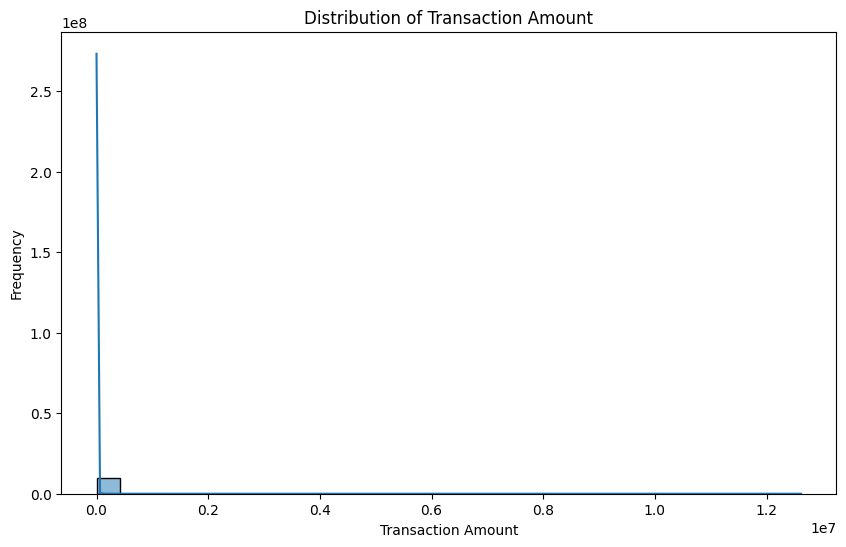

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


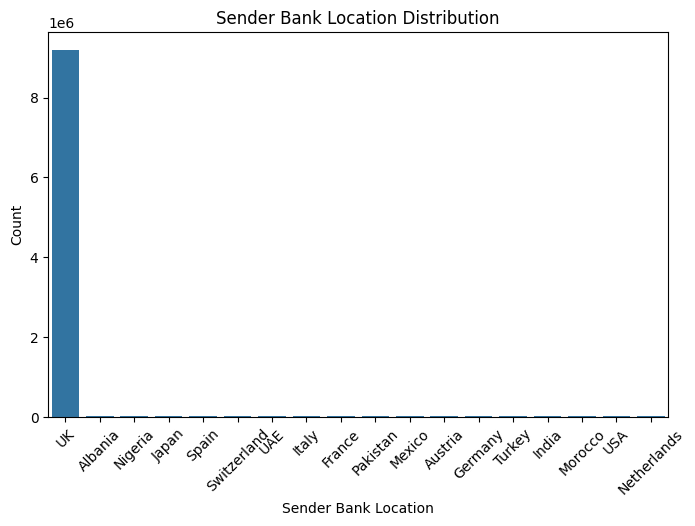

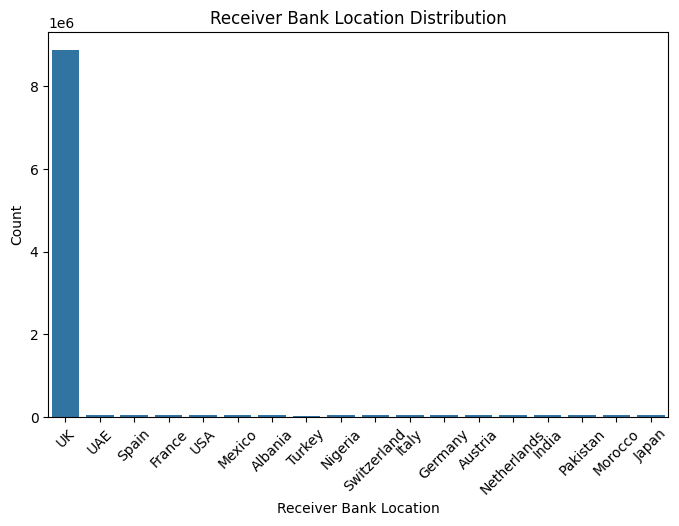

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sender_bank_location')
plt.title('Sender Bank Location Distribution')
plt.xlabel('Sender Bank Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Receiver_bank_location')
plt.title('Receiver Bank Location Distribution')
plt.xlabel('Receiver Bank Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


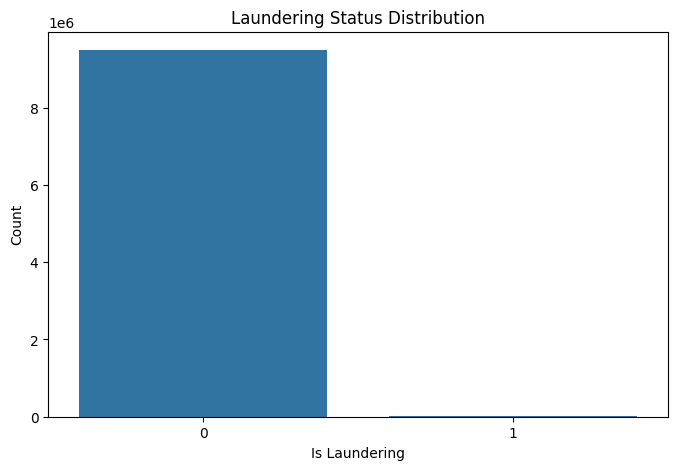

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Is_laundering')
plt.title('Laundering Status Distribution')
plt.xlabel('Is Laundering')
plt.ylabel('Count')
plt.show()


In [14]:

df_encoded = pd.get_dummies(df, columns=['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Laundering_type'], drop_first=True)


In [16]:
# Print the column names to check if 'Sender_bank_location' and 'Receiver_bank_location' exist
print(df.columns)


Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'],
      dtype='object')


In [17]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Payment_type', 'Sender_bank_location', 'Receiver_bank_location', 'Laundering_type'], drop_first=True)

# Display the first few rows to verify the encoding
df_encoded.head()


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Is_laundering,Payment_type_Cash Deposit,Payment_type_Cash Withdrawal,...,Laundering_type_Normal_Periodical,Laundering_type_Normal_Plus_Mutual,Laundering_type_Normal_Small_Fan_Out,Laundering_type_Normal_single_large,Laundering_type_Over-Invoicing,Laundering_type_Scatter-Gather,Laundering_type_Single_large,Laundering_type_Smurfing,Laundering_type_Stacked Bipartite,Laundering_type_Structuring
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,0,False,False,...,False,False,True,False,False,False,False,False,False,False
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Feature selection after encoding
features = df_encoded[['Amount'] + [col for col in df_encoded.columns if col != 'Is_laundering']]  # Select all features except target


In [19]:
# Feature selection after encoding
features = df_encoded[['Amount'] + [col for col in df_encoded.columns if col != 'Is_laundering']]  # Select all features except target


In [20]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features (e.g., Amount)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[['Amount']])  # Scale only the 'Amount' feature for simplicity


In [21]:
from sklearn.ensemble import IsolationForest

# Create Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01)  # Assuming ~1% anomalies (adjust based on your data)
isolation_forest.fit(features_scaled)

# Predict anomalies (outliers)
df['is_suspicious_if'] = isolation_forest.predict(features_scaled)
df['is_suspicious_if'] = df['is_suspicious_if'].map({-1: 'Suspicious', 1: 'Normal'})

# Display results
suspicious_if = df[df['is_suspicious_if'] == 'Suspicious']
print(suspicious_if[['Sender_account', 'Receiver_account', 'Amount', 'is_suspicious_if']])


         Sender_account  Receiver_account     Amount is_suspicious_if
586          5310672783        4729254795   88014.57       Suspicious
1001         2831014523        9689826880   60840.88       Suspicious
1012         4305368854        8126009332   47379.67       Suspicious
1026         4244137850        6491106472  998453.63       Suspicious
1298         4821439899        4561903097  256915.91       Suspicious
...                 ...               ...        ...              ...
9504280      3987737786        4741287907  479879.59       Suspicious
9504459      4965147033        6660227102   61513.55       Suspicious
9504516      8497811178        5105871383   46493.55       Suspicious
9504523      6035829755        4696430383   46864.08       Suspicious
9504752      4636697243        7236544862  133039.45       Suspicious

[94868 rows x 4 columns]
